In [24]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import Normalize
import seaborn as sns
import ast

plt.style.use('ggplot')

df_games = pd.read_csv('data\df_games_clean.csv')
df_items = pd.read_csv('data\df_items_clean.csv')
df_reviews = pd.read_csv('data\df_reviews_clean.csv')

count_reviews = pd.read_csv(r'data_api\count_reviews.csv')
developer = pd.read_csv(r'data_api\developer.csv')
genre = pd.read_csv(r'data_api\genre.csv')
sentiment = pd.read_csv(r'data_api\sentiment_analysis.csv')
user_data = pd.read_csv(r'data_api\user_data.csv')
userforgenre = pd.read_csv(r'data_api\userforgenre.csv')


C:\Users\gasto\AppData\Local\Temp\ipykernel_10516\197275909.py:19: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  userforgenre = pd.read_csv(r'data_api\userforgenre.csv')


# Analisis exploratorio de Datos y preparacion para modelado

Para esta etapa voy a seguir una serie de pasos que va a ser exactamente la misma para los 3 dataframes que creamos en el paso1_engineer.ipynb y para finalizar voy a juntarlos en uno unico que mas adelante utilizare en mi modelado de ML.

Tambien voy a aprovechar los dataframes pre-procesados que realice para alimentar las APIs ya que se puede acceder a informacion muy valiosa de ellos.

## 1°. Data Frame ITEMS

### Entiendiendo nuestros datos.

In [25]:
#Vemos el tamaño de nuestro DF
df_items.shape

(5153209, 9)

In [26]:
#hacemos un sampleo aleatorio para ver como esta estructurada nuestra informacion
df_items.sample(10)

,Unnamed: 0,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
3556672,3561661,grumpywalrus,58,76561198048658778,http://steamcommunity.com/id/grumpywalrus,223530.0,Left 4 Dead 2 Beta,0.0,0.0
2404988,2408143,Fallen_dingo,116,76561198011493552,http://steamcommunity.com/id/Fallen_dingo,377160.0,Fallout 4,394.0,0.0
2584892,2588348,gepaoisanaimbot,102,76561198082749610,http://steamcommunity.com/id/gepaoisanaimbot,295790.0,Never Alone (Kisima Ingitchuna),0.0,0.0
3718380,3723638,76561198086658851,53,76561198086658851,http://steamcommunity.com/profiles/76561198086...,239660.0,Soldier Front 2,49837.0,0.0
3730154,3735433,ArmyOfFreedom,26,76561198064775038,http://steamcommunity.com/id/ArmyOfFreedom,236390.0,War Thunder,0.0,0.0
2618566,2622065,Kusaryuu,862,76561198019968924,http://steamcommunity.com/id/Kusaryuu,393980.0,Pretty Girls Mahjong Solitaire,1013.0,0.0
3614264,3619341,76561198047683807,132,76561198047683807,http://steamcommunity.com/profiles/76561198047...,262060.0,Darkest Dungeon,1454.0,0.0
2605714,2609194,76561198068146802,53,76561198068146802,http://steamcommunity.com/profiles/76561198068...,244630.0,NEOTOKYO°,13.0,0.0
4129001,4135376,furianshi,44,76561198027085878,http://steamcommunity.com/id/furianshi,70300.0,VVVVVV,12.0,0.0
4705357,4714834,76561198067741817,6,76561198067741817,http://steamcommunity.com/profiles/76561198067...,220.0,Half-Life 2,2843.0,0.0


In [27]:
#nombres de las columnas, en este paso es donde iba a normalizar los nombre pero todo parece seguir
#una misma convencion
df_items.columns

Index(['Unnamed: 0', 'user_id', 'items_count', 'steam_id', 'user_url',
       'item_id', 'item_name', 'playtime_forever', 'playtime_2weeks'],
      dtype='object')

In [28]:
#tipos de los datos, tambien todo parece bien. Aparentemente la persona que se encargo 
#del data engineering hizo un trabajo decente (guiño guiño)
df_items.dtypes

Unnamed: 0            int64
user_id              object
items_count           int64
steam_id              int64
user_url             object
item_id             float64
item_name            object
playtime_forever    float64
playtime_2weeks     float64
dtype: object

### Preparacion de Datos

In [29]:
#vemos que tenemos algunas columnas que en este momento 
# no necesitamos por que son equivalentes user_url, steam_id y user_id hacen 
# referencia a lo mismo, si embargo por ahora no voy a eliminarlos ya que los 
# voy a necesitar mas adelante
#la unica columna que voy a eliminar que me puede entorpecer es "Unnamed: 0" (de nuevo)
df_items.sample(3)

,Unnamed: 0,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
4848143,4860311,imasniperrughtbehindyou,47,76561198076119945,http://steamcommunity.com/id/imasniperrughtbeh...,224420.0,Afterfall InSanity Extended Edition,1.0,0.0
930717,931852,76561198076357381,54,76561198076357381,http://steamcommunity.com/profiles/76561198076...,304050.0,Trove,0.0,0.0
1291364,1292960,Shohmyooh127,47,76561198068784986,http://steamcommunity.com/id/Shohmyooh127,22300.0,Fallout 3,502.0,0.0


In [30]:
df_items.drop(columns=["Unnamed: 0"], inplace=True)

In [31]:
#intentando identificar si aun tenemos valores faltantes. 
df_items.isna().sum()

user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

In [32]:
#intentando identificar si tenemos tenemos valores duplicados. 

df_items.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
5153204    False
5153205    False
5153206    False
5153207    False
5153208    False
Length: 5153209, dtype: bool

In [33]:
df_items["item_name"].value_counts()

item_name
Dota 2 Test                            49571
Counter-Strike: Global Offensive       43776
Garry's Mod                            43301
Unturned                               38682
Left 4 Dead 2                          37044
                                       ...  
My Own Pet                                 1
Medieval Battlefields Black Edition        1
Football VR                                1
Tower Dwellers                             1
Arachnophobia                              1
Name: count, Length: 10947, dtype: int64

In [34]:
df_graph_items = pd.DataFrame({"item_name": df_items["item_name"], "playtime_forever" : df_items["playtime_forever"].astype('int32')})


## 2°. Data Frame REVIEWS

### Entendiendo nuestros datos

In [35]:
#Vemos el tamaño de nuestro DF
df_reviews.shape

(59305, 6)

In [36]:
#hacemos un sampleo aleatorio para ver como esta estructurada nuestra informacion
df_reviews.sample(5)

,user_id,user_url,posted,item_id,recommend,sentimiento
56479,76561198092003845,http://steamcommunity.com/profiles/76561198092...,2014-02-13,247730.0,True,2
30518,gamingftw123,http://steamcommunity.com/id/gamingftw123,2013-11-18,105600.0,True,2
29340,76561198065948218,http://steamcommunity.com/profiles/76561198065...,2015-07-06,50300.0,True,2
2497,76561197996156672,http://steamcommunity.com/profiles/76561197996...,2015-11-16,570.0,True,2
26072,Hw__aN,http://steamcommunity.com/id/Hw__aN,2013-08-20,206690.0,True,2


In [37]:
#nombres de las columnas
df_reviews.columns

Index(['user_id', 'user_url', 'posted', 'item_id', 'recommend', 'sentimiento'], dtype='object')

In [38]:
#posted deveria ser un datetime, no un object
df_reviews.dtypes

user_id         object
user_url        object
posted          object
item_id        float64
recommend         bool
sentimiento      int64
dtype: object

In [39]:
df_reviews["posted"] = pd.to_datetime(df_reviews["posted"])

In [40]:
df_reviews.dtypes

user_id                object
user_url               object
posted         datetime64[ns]
item_id               float64
recommend                bool
sentimiento             int64
dtype: object

### Preparacion de Datos


In [41]:
#encontramos algo similar con respecto al df anterior, user_id y user_url son referenciales a lo mismo. Por ahora los vamos a dejar.
df_reviews.sample(3)

,user_id,user_url,posted,item_id,recommend,sentimiento
51754,isaacredfist,http://steamcommunity.com/id/isaacredfist,NaT,224260.0,True,2
31436,fuccboihectic,http://steamcommunity.com/id/fuccboihectic,2014-05-30,570.0,False,0
3197,76561197970565267,http://steamcommunity.com/profiles/76561197970...,2015-05-11,221100.0,False,1


In [42]:
#intentando identificar si aun tenemos valores faltantes. 
df_reviews.isna().sum()

user_id            0
user_url           0
posted         10119
item_id            0
recommend          0
sentimiento        0
dtype: int64

Los nulos constituyen casi un 20% del total de los datos de la columna de fecha, lo cual dificulta un poco el analisis. 
En este caso voy a eliminar la columna ya que no la necesito para hacer mi modelado y no me va a aportar un valor significativo. 
Si en vez de eliminar la columna, elimino las filas que contienen nulos, me quedo con los datos de la fecha que fuero posteados pero pierdo mucha informacion valiosa sobre todo en la columna recommend y sentimiento


Recuerdo que ya tengo mis datos preprosesados para responder las consultas de la APIs. Este EDA va dirigido principalmente al modelado

In [43]:
df_reviews.drop(columns=['posted'], inplace= True)

In [44]:
df_reviews.sample(3)

,user_id,user_url,item_id,recommend,sentimiento
22237,Gabo9,http://steamcommunity.com/id/Gabo9,4000.0,True,2
54957,76561198083456018,http://steamcommunity.com/profiles/76561198083...,250420.0,False,0
52916,blastingdiamond,http://steamcommunity.com/id/blastingdiamond,63380.0,True,2


### Buscando caracteristicas en nustros DF

## 3°. Data Frame GAMES

In [45]:
#Vemos el tamaño de nuestro DF
df_games.shape

(31824, 12)

In [46]:
#hacemos un sampleo aleatorio para ver como esta estructurada nuestra informacion
df_games.sample(5)

,genres,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,atributos
21596,['Action'],N++ (NPLUSPLUS),http://store.steampowered.com/app/230270/N_NPL...,2016-08-25,"['Platformer', 'Difficult', 'Action', 'Great S...",http://steamcommunity.com/app/230270/reviews/?...,"['Single-player', 'Local Multi-Player', 'Local...",14.99,0.0,230270.0,Metanet Software Inc.,"['Ninja', 'Steam Cloud', 'Parkour', '2D', 'Dif..."
12683,"['Action', 'Adventure', 'Indie', 'Early Access']",Nakiti Generations,http://store.steampowered.com/app/512120/Nakit...,2017-12-14,"['Early Access', 'Action', 'Adventure', 'Indie...",http://steamcommunity.com/app/512120/reviews/?...,"['Single-player', 'Partial Controller Support']",6.99,1.0,512120.0,Diablohead,"['Partial Controller Support', 'Metroidvania',..."
11657,"['Action', 'Indie']",Cruz Brothers,http://store.steampowered.com/app/697870/Cruz_...,NoData,"['Action', 'Indie', 'Violent']",http://steamcommunity.com/app/697870/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",0.00,0.0,697870.0,DCF Studios,"['Local Multi-Player', 'Full controller suppor..."
4391,"['Indie', 'Sports']",Pumped BMX +,http://store.steampowered.com/app/392070/Pumpe...,2015-09-18,"['Sports', 'Indie']",http://steamcommunity.com/app/392070/reviews/?...,"['Single-player', 'Steam Achievements', 'Full ...",9.99,0.0,392070.0,Yeah Us!,"['Stats', 'Full controller support', 'Indie', ..."
15787,"['Action', 'Free to Play', 'Indie', 'Early Acc...",Null Vector,http://store.steampowered.com/app/608110/Null_...,2017-08-30,"['Early Access', 'Free to Play', 'Indie', 'Act...",http://steamcommunity.com/app/608110/reviews/?...,"['Single-player', 'Local Multi-Player', 'Local...",0.00,1.0,608110.0,Optical Override,"['Partial Controller Support', 'Local Co-op', ..."


In [47]:
#id refiere a item_id.
#tambien tenemos la columna que cree antes de atributos con la union de genres, specs y tags.

df_games.columns

Index(['genres', 'title', 'url', 'release_date', 'tags', 'reviews_url',
       'specs', 'price', 'early_access', 'id', 'developer', 'atributos'],
      dtype='object')

### Preparacion de Datos

In [48]:
#voy a eliminar las columnas de specs, genres y tags para hacer el modelado y con la columna atributos voy a generar dummies.

df_games.rename(columns= {'id' : "item_id"}, inplace=True)

In [49]:
df_games.drop(columns=["genres","tags","specs"], inplace=True)

In [50]:
#Hay que acomodar algunos tipos de datos como "early_access", "release_date" y transformar a dummies "atributos"
df_games.dtypes

title            object
url              object
release_date     object
reviews_url      object
price           float64
early_access    float64
item_id         float64
developer        object
atributos        object
dtype: object

In [51]:
df_games['release_date'] = df_games['release_date'].replace("NoData", np.nan)
df_games['release_date'] = pd.to_datetime(df_games['release_date'])
df_games["early_access"] = df_games["early_access"].astype(bool)
df_games['atributos'] = df_games['atributos'].apply(ast.literal_eval)


In [52]:
df_games.dtypes

title                   object
url                     object
release_date    datetime64[ns]
reviews_url             object
price                  float64
early_access              bool
item_id                float64
developer               object
atributos               object
dtype: object

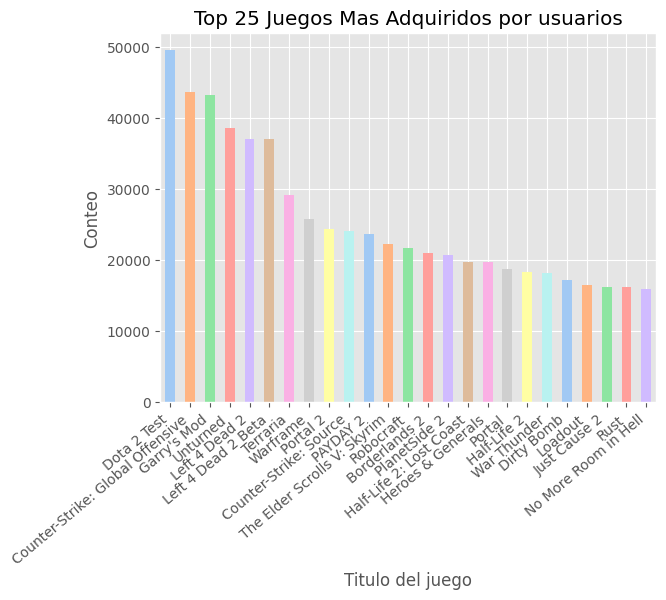

In [62]:
colors = sns.color_palette('pastel')
ax = df_items["item_name"].value_counts()\
    .head(25)\
    .plot(kind='bar', title = 'Top 25 Juegos Mas Adquiridos por usuarios', color=colors)
ax.set_xlabel('Titulo del juego')
ax.set_ylabel('Conteo')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.show()

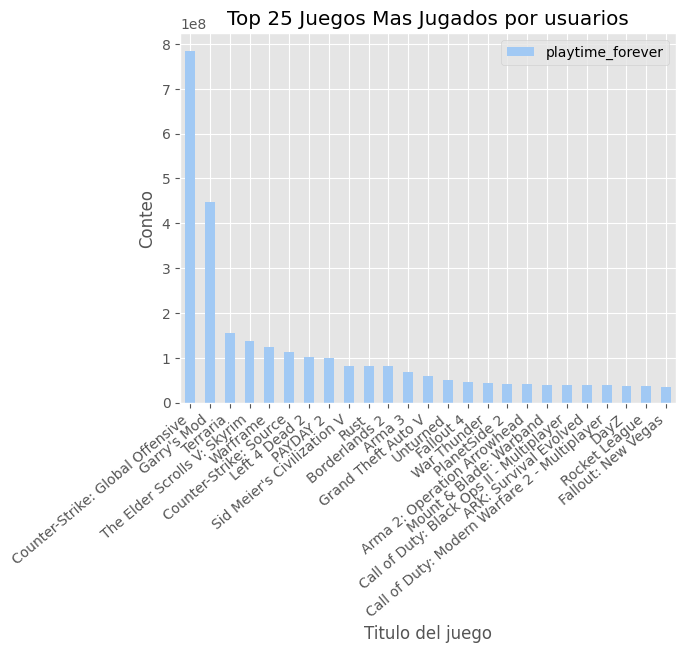

In [63]:
colors = sns.color_palette('pastel')
ax = pd.DataFrame(df_graph_items.groupby('item_name')['playtime_forever']\
    .sum()).sort_values(by="playtime_forever", ascending=False)\
    .head(25)\
    .plot(kind='bar', title = 'Top 25 Juegos Mas Jugados por usuarios',color=colors)
ax.set_xlabel('Titulo del juego')
ax.set_ylabel('Conteo')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha='right')
plt.show()


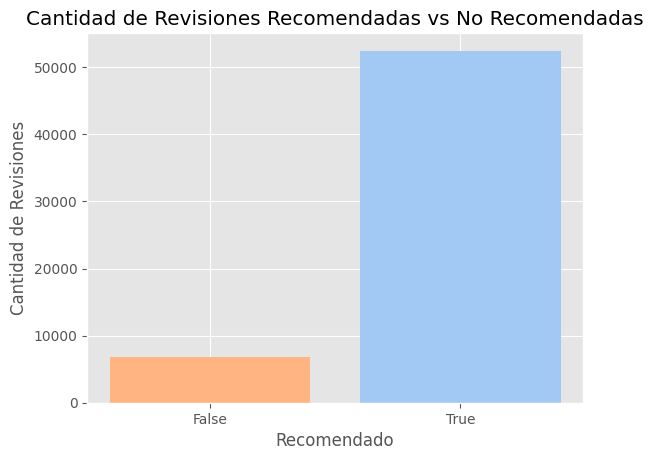

In [64]:
colors = sns.color_palette('pastel')

ax =  df_reviews['recommend'].value_counts()
plt.bar(ax.index, ax.values, color=colors)
plt.xlabel('Recomendado')
plt.ylabel('Cantidad de Revisiones')
plt.xticks([False, True], ['False', 'True'])
plt.title('Cantidad de Revisiones Recomendadas vs No Recomendadas')
plt.show()



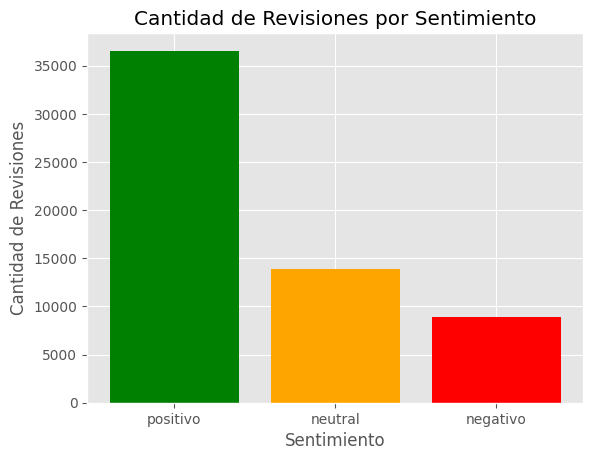

In [65]:
colors = ['green', 'orange', 'red']
df_rev_sentimiento = df_reviews.copy()
df_rev_sentimiento['sentimiento'] = df_rev_sentimiento['sentimiento'].map({0: 'negativo', 1: 'neutral', 2: 'positivo'})
sentimiento_counts = df_rev_sentimiento['sentimiento'].value_counts()
plt.bar(sentimiento_counts.index, sentimiento_counts.values, color=colors)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Revisiones')
plt.title('Cantidad de Revisiones por Sentimiento')
plt.show()


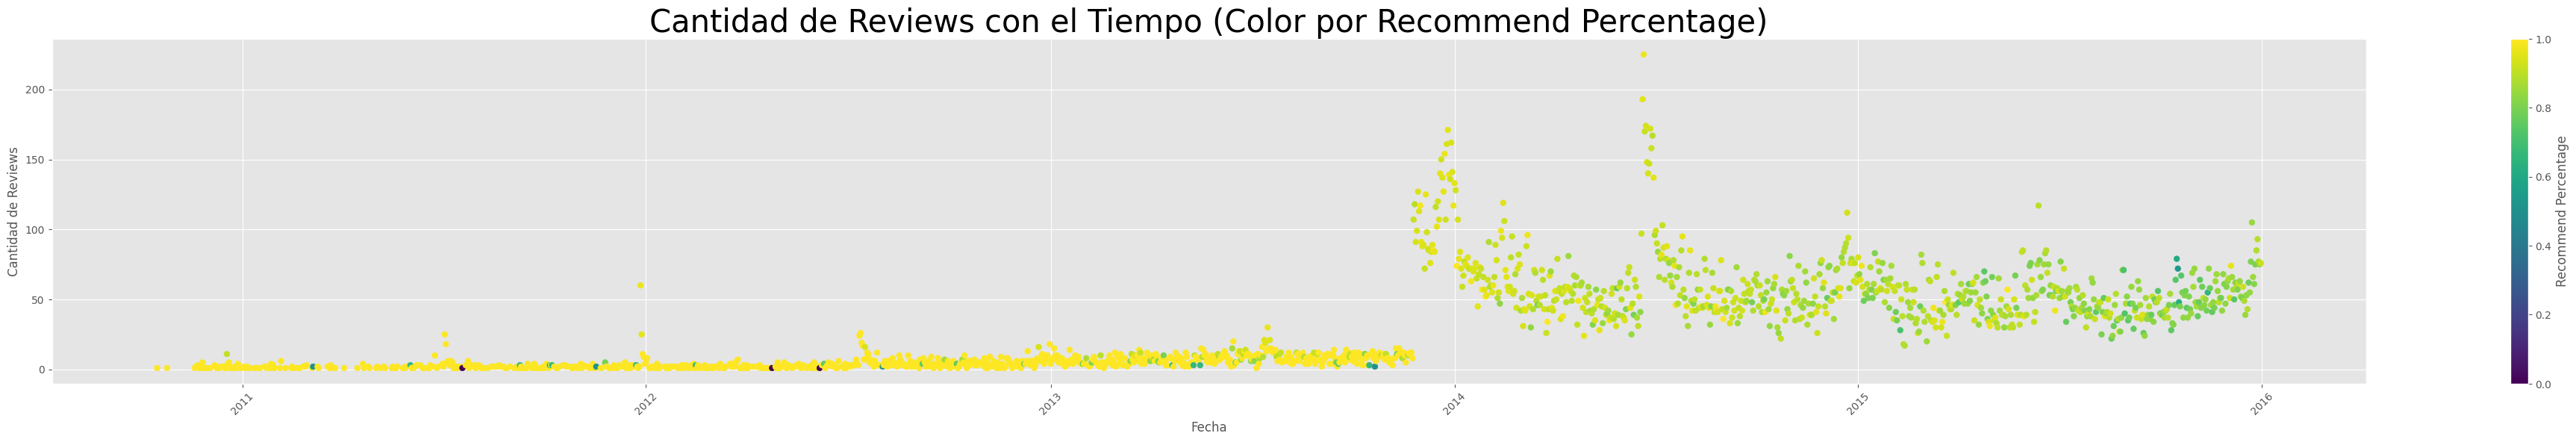

In [66]:
count_reviews['posted'] = pd.to_datetime(count_reviews['posted'])
normalize = Normalize(vmin=count_reviews['recommend_percentage'].min(), vmax=count_reviews['recommend_percentage'].max())
colors = plt.cm.viridis(normalize(count_reviews['recommend_percentage']))
plt.figure(figsize=(50, 6))
plt.scatter(count_reviews['posted'], count_reviews['sum_review'], c=colors, s=30, label='Reviews')
plt.colorbar(label='Recommend Percentage')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Reviews')
plt.title('Cantidad de Reviews con el Tiempo (Color por Recommend Percentage)', fontsize=30)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

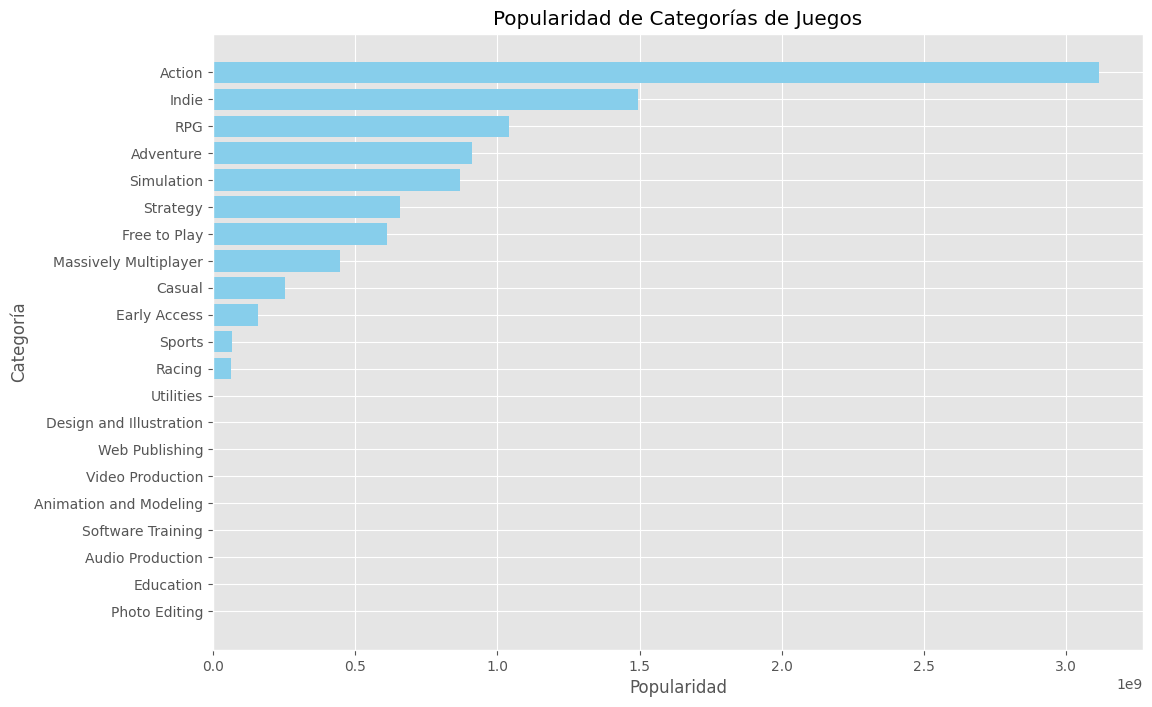

In [67]:
genre
plt.figure(figsize=(12, 8))
plt.barh(genre['genres'], genre['playtime_forever'], color='skyblue')
plt.xlabel('Popularidad')
plt.ylabel('Categoría')
plt.title('Popularidad de Categorías de Juegos')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la categoría más popular en la parte superior

# Mostrar el gráfico
plt.show()

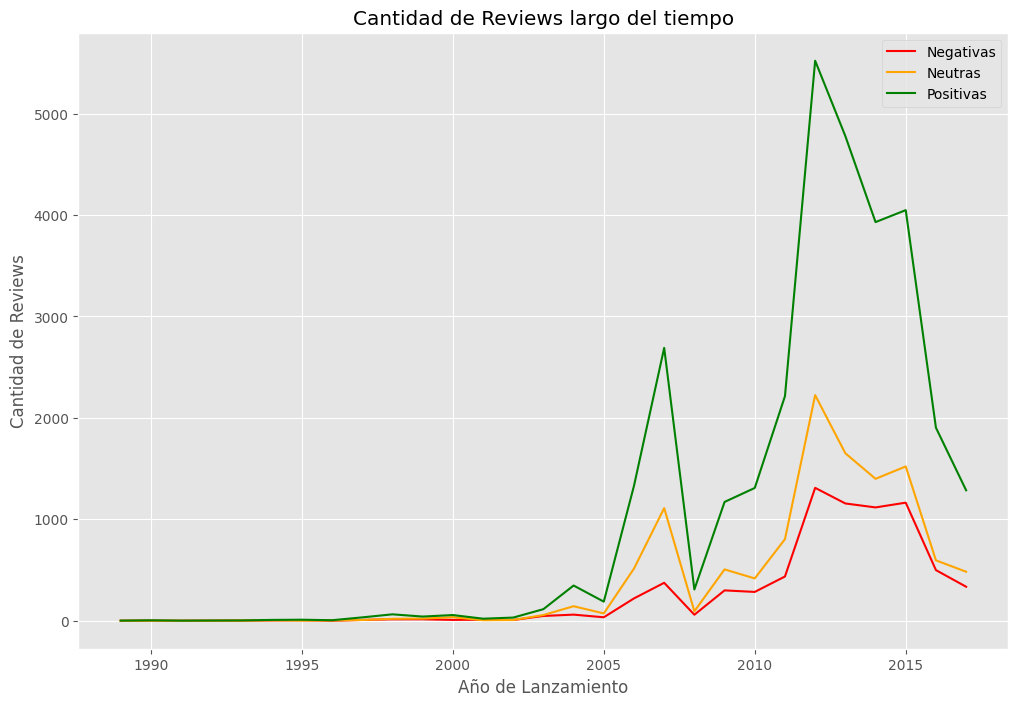

In [68]:
sentiment
plt.figure(figsize=(12, 8))
plt.plot(sentiment['release_date'], sentiment['0'], label='Negativas', color='red')
plt.plot(sentiment['release_date'], sentiment['1'], label='Neutras', color='orange')
plt.plot(sentiment['release_date'], sentiment['2'], label='Positivas', color='green')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Reviews')
plt.title('Cantidad de Reviews largo del tiempo')
plt.legend()
plt.grid(True)



In [69]:
df_items.drop(columns=["items_count", "steam_id","user_url", "playtime_forever", "playtime_2weeks","user_id"], inplace=True)
df_games.drop(columns=["url","release_date","reviews_url","early_access"],inplace=True)
df_reviews.drop(columns=["user_url","user_id",], inplace=True)

In [70]:
#juegos con mas recomendaciones
df_reviews = df_reviews.replace({True: 1, False:-1}).groupby('item_id').agg({'recommend': 'sum', 'sentimiento': 'mean'}).reset_index()

In [71]:
#voy a crear un indice entre recommend y sentimineto.
df_reviews['score'] = df_reviews['recommend'] / df_reviews['recommend'].max() + df_reviews['sentimiento'] / df_reviews['sentimiento'].max()
df_reviews['score'] = (df_reviews['score'] - df_reviews['score'].min()) / (df_reviews['score'].max() - df_reviews['score'].min())
df_reviews.drop(columns=["recommend", "sentimiento"], inplace=True)

In [72]:
#elimino espacios de cada uno de los atributos y las columnas que ya no necesito
df_games["atributos"] = df_games["atributos"].apply(lambda x:[i.replace(" ","") for i in x])
df_games["atributos"] = df_games["atributos"].apply(lambda x: ', '.join(map(str, x)))
df_games["tags"] = df_games["atributos"]+df_games["price"].astype(str)+df_games["developer"]
df_games.drop(columns=["atributos","developer","price"], inplace=True)
df_games["tags"] = df_games["tags"].apply(lambda x: x.lower())


In [73]:
df_itemsxitems = pd.merge(df_games, df_reviews, on="item_id", how="outer")
df_itemsxitems = df_itemsxitems.dropna(subset="title").fillna(0).sort_values(by="score", ascending=False)



DataFrame que voy a utilizar para alimentar mi modelo de prediccion item x item

In [74]:
df_itemsxitems.to_csv("datos_ML.csv")
df_itemsxitems.head(2000).to_csv("datos_ML_reduced.csv")

In [3]:
import pandas as pd
df_ML = pd.read_csv(r"data_api\datos_ML.csv")
df_ML_reduced = pd.read_csv(r"data_api\datos_ML_reduced.csv")

In [4]:
#importamos librerias, voy a utilizar CountVectorizer para poder vectorizar la informacion. 
#para esto usamos CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=45, stop_words="english")



Vectorizamos para pasar texto a un vector lo que nos permite haces comparaciones entre ellos y encontrar similitudes

In [5]:
#toarray() para convertirlo en un array de numpy. seleccionamos solo las 2000 mejor puntuadas
vectors = cv.fit_transform(df_ML_reduced["tags"]).toarray()


In [6]:
#ahora vamos a aplicar el algoritmo de coseno de similitud
#importamos cosine_similarity y la aplicamos a nuestra data que vamos a usar para el modelo.
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

In [7]:
#exportamos el modelo para despues no tener que volver a entrenarlo
import joblib
joblib.dump(similarity,'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [8]:
#vemos que el modelo es un array de numpy, lo que quiere decir que podriamos agregarle datos de nuevos juegos y asi poder predecir recomendaciones en base a esos datos.

type(similarity)

numpy.ndarray

In [9]:
similarity.shape

(2000, 2000)

In [10]:
#esta es la funcion con la que implementariamos el modelo, como vemo hacer unas recomendaciones bastantes acertadas sin caer en la reduncancia.
#dentro de los try y except no se puede llamar a variables externas a la funcion por o que me veo forzado a correr siempre la carga del modelo.
def recommend(id_jueguito):
    try:
        similarity = joblib.load('modelo_entrenado.pkl')
        idx = df_ML_reduced[df_ML_reduced["item_id"] == id_jueguito].index[0]
        distances = similarity[idx]   
        jueguito = sorted(list(enumerate(distances)), reverse=True, key= lambda x:x[1])[1:6]
        respon = {"tu juego es" : df_ML_reduced[df_ML_reduced["item_id"]==id_jueguito].iloc[0,1],
                "recomendaciones": []}
        for i in jueguito:
            respon["recomendaciones"].append(df_ML_reduced.iloc[i[0]].title)
        
        return respon
    except IndexError:
        print("buscando recomendaciones, por favor espere")
        new_game = df_ML[df_ML["item_id"] == id_jueguito]
        df_combined = pd.concat([df_ML,new_game])
        vectors = cv.fit_transform(df_combined["tags"]).toarray()
        similarity=cosine_similarity(vectors)
        idx = df_combined[df_combined["item_id"] == id_jueguito].index[0]
        distances = similarity[idx]   
        jueguito = sorted(list(enumerate(distances)), reverse=True, key= lambda x:x[1])[1:6]
        respon = {"tu juego es" : df_combined[df_combined["item_id"]==id_jueguito].iloc[0,1],
        "recomendaciones": []}
        for i in jueguito:
            respon["recomendaciones"].append(df_combined.iloc[i[0]].title)
            
        return respon
            


### Pruebas de modelos con *Counter-Strike*

In [12]:
recommend(761140.0)

{'tu juego es': 'Counter-Strike',
 'recomendaciones': ["Tom Clancy's Rainbow Six® Siege - Ultra HD Texture Pack",
  'Empires Mod',
  'Deathmatch Classic',
  'Day of Defeat',
  'ARMA: Gold Edition']}

En las siguientes lineas voy a probar hiperparametros. unicamente voy a cambiar el "max_features" que hace referencia a la cantidad de tags que estaria tomando de la tabla df_itemsxitems

Lo que estoy buscando especificamente es que no recomiende con una perfeccion del 100% ya que mientras mas potente sea el modelo, mas esperables son las recomendaciones.

En los casos en que teniamos un elevado nivel de features y mas juegos en nuestra base de datos, mas esperables son los resultados.

En mi modelo no pretendo lograr una recomendacion perfecta pues, si pido una recomendacion de un juego con base a algo que ya he jugado, lo mas probable es que ya conosca de sus secuelas o otras adaptaciones. Una recomendacion a mi parecer debe ser lo suficientemente cercana al juego original como para manterer ciertas "features" que hacen al genero o tipo de jugabilidad, pero no tanto como para que sea redundante (como sucede en la primer muestra)


Por este motivo elijo entrenar a mi con esos hiperparametros especificos. 

Tambien debo aclarar que elegi este juego por que era el primero de la lista por su numero de id y por que es casi conocido por todos. Esta misma logica dudo que se aplique para el total de los juegos de nuestra base de datos.

In [92]:
recommend(10) #max_features = 2000. 5000 juegos en la base de datos

{'tu juego es': 'Counter-Strike',
 'recomendaciones': ['Counter-Strike: Condition Zero',
  'Counter-Strike: Source',
  'Day of Defeat',
  'Deathmatch Classic',
  'Half-Life Deathmatch: Source']}

In [80]:
recommend(10) #max_features = 500  2000 juegos en la base de datos

{'tu juego es': 'Counter-Strike',
 'recomendaciones': ['Counter-Strike: Source',
  'Day of Defeat',
  'Deathmatch Classic',
  'Counter-Strike: Global Offensive',
  'Team Fortress Classic']}

In [44]:
recommend(10) #max_features = 50   2000 juegos en la base de datos

{'tu juego es': 'Counter-Strike',
 'recomendaciones': ['Day of Defeat',
  'Deathmatch Classic',
  "Tom Clancy's Rainbow Six® Siege - Ultra HD Texture Pack",
  'Empires Mod',
  'Day of Defeat: Source']}

In [56]:
recommend(10) #max_feautures = 40   2000 juegos en la base de datos

{'tu juego es': 'Counter-Strike',
 'recomendaciones': ["Tom Clancy's Rainbow Six® Siege - Ultra HD Texture Pack",
  'Empires Mod',
  'Deathmatch Classic',
  'Reflex Arena',
  'Day of Defeat']}

In [69]:
recommend(10) #max_features = 45   2000 juegos en la base de datos

{'tu juego es': 'Counter-Strike',
 'recomendaciones': ["Tom Clancy's Rainbow Six® Siege - Ultra HD Texture Pack",
  'Empires Mod',
  'Deathmatch Classic',
  'Day of Defeat',
  'ARMA: Gold Edition']}